# Lesson 3 Codealong
Instructor: Amy Roberts, PhD

In [1]:
#General imports
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Part 1. Basic Stats
	
    Methods available include: 
		.min() - Compute minimum value
		.max() - Compute maximum value
		.mean() - Compute mean value
		.median() - Compute median value
        .mode() - Compute mode value(s)
		.count() - Count the number of observations

#### Read in the examples

In [2]:
df = pd.DataFrame({'example1' : [18, 24, 17, 21, 24, 16, 29, 18], 'example2' : [75, 87, 49, 68, 75, 84, 98, 92], 'example3' : [55, 47, 38, 66, 56, 64, 44, 39] })
print df


   example1  example2  example3
0        18        75        55
1        24        87        47
2        17        49        38
3        21        68        66
4        24        75        56
5        16        84        64
6        29        98        44
7        18        92        39


#### Instructor example- calculate the mean for each coloumn

In [3]:
df.mean()

example1    20.875
example2    78.500
example3    51.125
dtype: float64

#### Students: Calculate median, mode, max, min for example

Note all the answers should match your hand calculations

In [4]:
df.max()

example1    29
example2    98
example3    66
dtype: int64

In [5]:
df.min()

example1    16
example2    49
example3    38
dtype: int64

In [6]:
df.median()

example1    19.5
example2    79.5
example3    51.0
dtype: float64

In [9]:
df.mode()

,example1,example2,example3
0,18,75,NaN
1,24,NaN,NaN


<strong>MP's Results:</strong>
A: 
•	Min = 16
•	Max = 29
•	Mean = 20.87
•	Mode = 18, 24
•	Median =  22.5?
B:
•	Min = 49
•	Max = 98
•	Mean = 78.5
•	Mode = 75
•	Median = 79.5?
C:
•	Min = 38
•	Max = 66
•	Mean = 51.125
•	Mode = None
•	Median = 41

### Part 2. Box Plot

#### Instructor: Interquartile range 

In [10]:
print "50% Quartile:"
print df.quantile(.50) 
print "Median (red line of the box)"
print df.median()

50% Quartile:
example1    19.5
example2    79.5
example3    51.0
dtype: float64
Median (red line of the box)
example1    19.5
example2    79.5
example3    51.0
dtype: float64


In [12]:
print"25% (bottom of the box)"
print df.quantile(0.25)
print"75% (top of the box)"
print df.quantile(0.75)

25% (bottom of the box)
example1    17.75
example2    73.25
example3    42.75
dtype: float64
75% (top of the box)
example1    24.00
example2    88.25
example3    58.00
dtype: float64


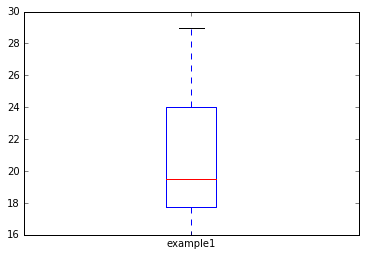

In [13]:
df['example1'].plot(kind='box')

#### Student: Create plots for examples 2 and three and check the quartiles

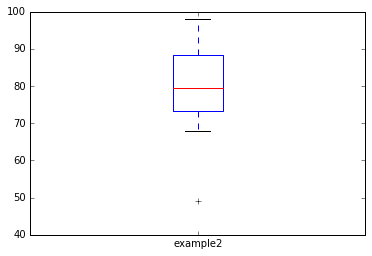

In [14]:
df["example2"].plot(kind="box")

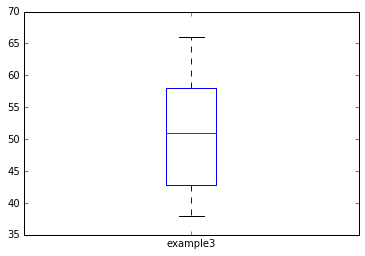

In [16]:
df["example3"].plot(kind="box")

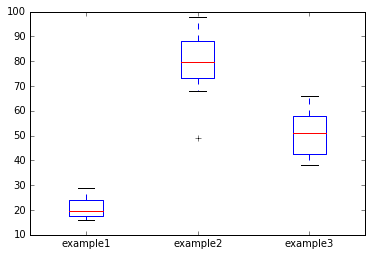

In [22]:
df.plot.box("example1")

#### What does the cross in example 2 represent?

Answer: An outlier (what qualifies as an outlier is based on the default but you can change it)

### Part 3. Standard Deviation and Variance

**Variance:** The variance is how much the predictions for a given point vary between different realizations of the model.

**Standard Deviation:** It is the square root of the variance

<img(src='../../assets/images/biasVsVarianceImage.png', style="width: 30%; height: 30%")>

#### In Pandas
	Methods include: 
		.std() - Compute Standard Deviation
		.var() - Compute variance

#### Let's calculate variance by hand first. 
<img(src='../../assets/images/samplevarstd.png', style="width: 50%; height: 50%")>

In [24]:
#example1
mean = df["example1"].mean()
n= df["example1"].count()

print df["example1"]
print mean
print n


0    18
1    24
2    17
3    21
4    24
5    16
6    29
7    18
Name: example1, dtype: int64
20.875
8


In [25]:
# written out by hand for instructional purposes 
#if there is time have the students refactor this to create a function to calculate variance for any dataset
#find the squared distance from the mean

obs0 = (18 - mean)**2
obs1 = (24 - mean)**2
obs2 = (17 - mean)**2
obs3 = (21 - mean)**2
obs4 = (24 - mean)**2
obs5 = (16 - mean)**2
obs6 = (29 - mean)**2
obs7 = (18 - mean)**2

print obs0, obs1, obs2, obs3, obs4, obs5, obs6, obs7

#sum each observation's squared distance from the mean 
numerator = obs0 + obs1 + obs2 + obs3 + obs4 + obs5 + obs6 +obs7
denominator = n - 1
variance = numerator/denominator
print numerator 
print denominator
print variance



8.265625 9.765625 15.015625 0.015625 9.765625 23.765625 66.015625 8.265625
140.875
7
20.125


In [ ]:
# in pandas
print "Variance"
print df["example1"].var()

#### Students: calculate the standard deviation by hand for each sample
Recall that it's the square root of the variance. 

In [1]:
#find the variance for each dataset
#Variance Example2
def varfind(dataset):
    sum2 = float(0)
    for i in df[dataset]:
        sum2+=i
    mean = sum2/len(df[dataset])
    meandiff=[]
    for k in df[dataset]:
        meandiff.append((k-mean)**2)
    denominator = len(df[dataset])-1
    numerator = 0
    for j in meandiff:
        numerator+=j
    variance =numerator/denominator
    return(variance)

print(varfind("example1"))
print(varfind("ex`ample2"))
print(varfind("example3"))

NameError: global name 'df' is not defined

In [64]:
def stddev(variance):
    standard = variance.sqrt()
    print standard
stddev(20.125)

AttributeError: 'float' object has no attribute 'sqrt'

In [56]:
((df["example2"]-df["example2"].mean())**2).sum() / (df["example2"].count()-1)

238.57142857142858

In [57]:
#now with pandas
df.std()

example1     4.486090
example2    15.445758
example3    10.776131
dtype: float64

#### Short Cut!

In [58]:
df.describe()

,example1,example2,example3
count,8.00000,8.000000,8.000000
mean,20.87500,78.500000,51.125000
std,4.48609,15.445758,10.776131
min,16.00000,49.000000,38.000000
25%,17.75000,73.250000,42.750000
50%,19.50000,79.500000,51.000000
75%,24.00000,88.250000,58.000000
max,29.00000,98.000000,66.000000


#### Student: Check understanding 
Which value in the above table is the median? 

    Answer: The fiftieth percentile

### Part 4: Correlation

In [59]:
df.corr()

,example1,example2,example3
example1,1.000000,0.477283,-0.123745
example2,0.477283,1.000000,-0.057076
example3,-0.123745,-0.057076,1.000000
